<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab3/blob/main/6351071071_LAB3_Bai5(Trang26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Hữu Toàn – 6351071071
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)
Số giá trị null train_images: 0
Số giá trị null train_labels: 0


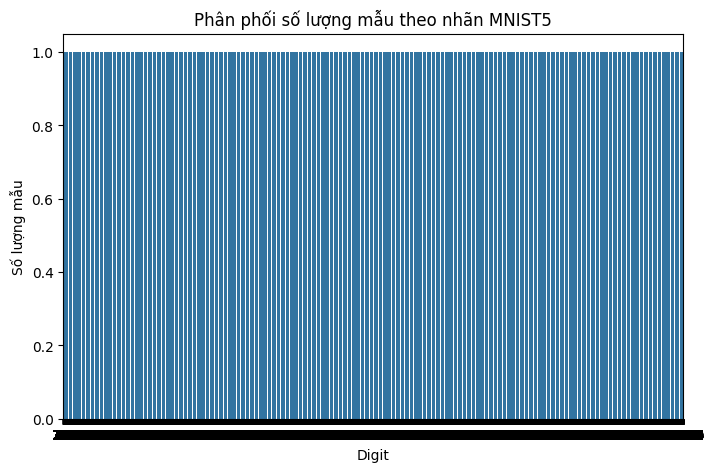

Shape dữ liệu flatten: (60000, 784)


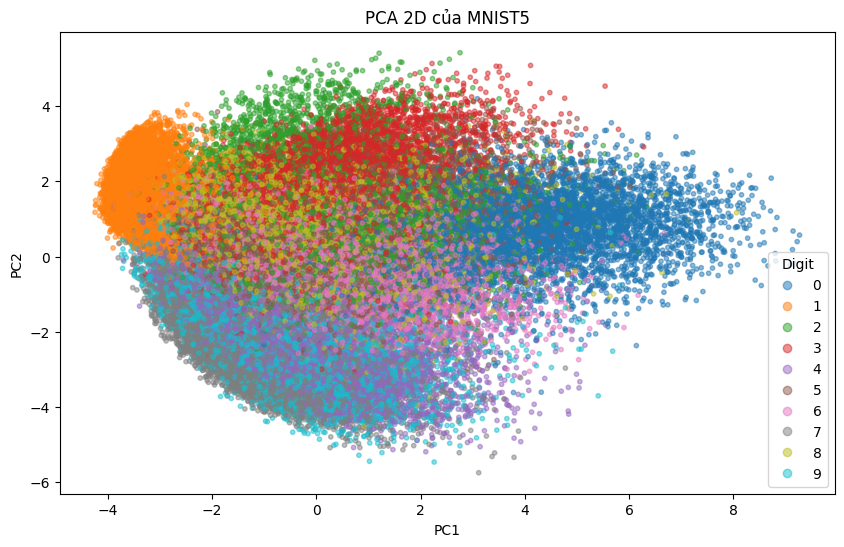

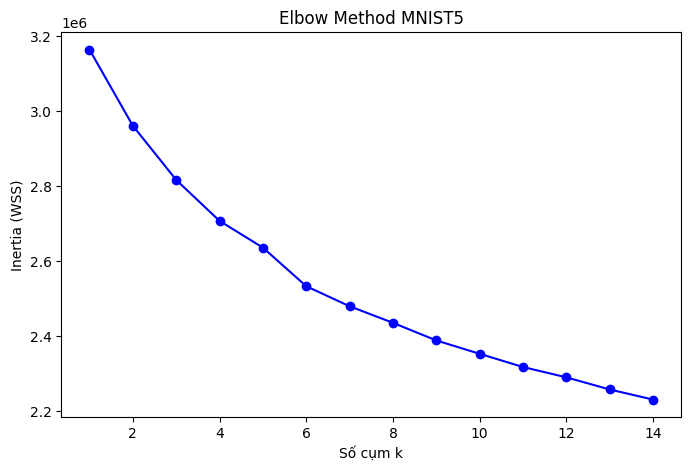

Silhouette score trung bình: 0.055929237149709446


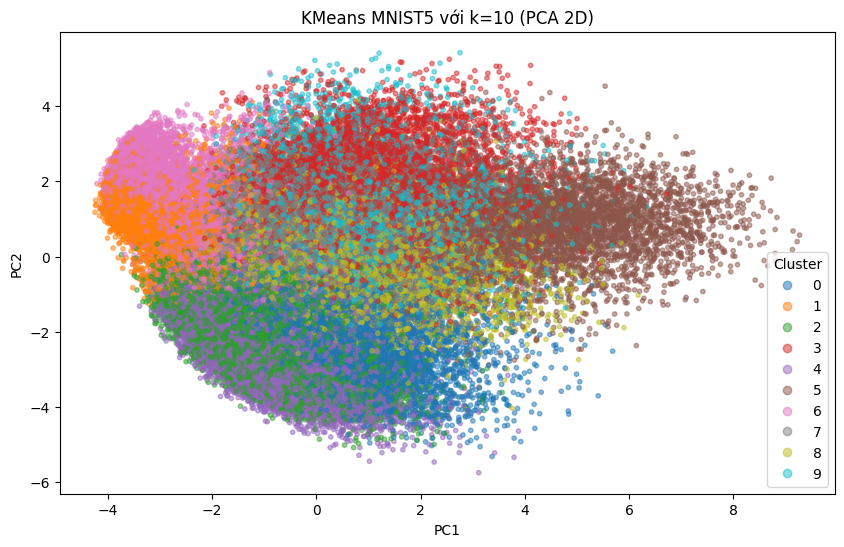

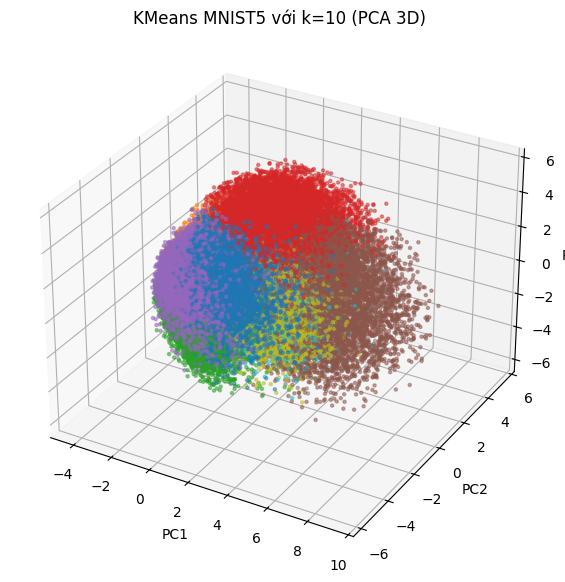

In [2]:
print("Nguyễn Hữu Toàn – 6351071071")

# Import thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# Nhập dữ liệu, thống kê cơ bản
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

# Kiểm tra giá trị thiếu
print("Số giá trị null train_images:", np.isnan(train_images).sum())
print("Số giá trị null train_labels:", np.isnan(train_labels).sum())

# Histogram số lượng mẫu theo nhãn
plt.figure(figsize=(8,5))
sns.countplot(train_labels)
plt.title("Phân phối số lượng mẫu theo nhãn MNIST5")
plt.xlabel("Digit")
plt.ylabel("Số lượng mẫu")
plt.show()

# Flatten ảnh và chuẩn hóa pixel về [0,1]
X = train_images.reshape(train_images.shape[0], -1) / 255.0
print("Shape dữ liệu flatten:", X.shape)

# PCA 2D để trực quan hóa phân phối dữ liệu
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=train_labels, cmap='tab10', alpha=0.5, s=10)
plt.legend(*scatter.legend_elements(), title="Digit")
plt.title("PCA 2D của MNIST5")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Elbow method để chọn số cụm k
inertia = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'o-', color='blue')
plt.xlabel("Số cụm k")
plt.ylabel("Inertia (WSS)")
plt.title("Elbow Method MNIST5")
plt.show()

# Gom cụm k-Means với k=10 (MNIST5 có 10 chữ số)
k_opt = 10
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Silhouette coefficient
sil_score = silhouette_score(X, labels)
print("Silhouette score trung bình:", sil_score)

# Biểu diễn kết quả gom cụm bằng PCA 2D ---
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels, cmap='tab10', alpha=0.5, s=10)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("KMeans MNIST5 với k=10 (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Tùy chọn: PCA 3D để trực quan hóa
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=labels, cmap='tab10', alpha=0.5, s=5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("KMeans MNIST5 với k=10 (PCA 3D)")
plt.show()